FIRST STEP :

In [35]:
! pip install mediapipe

  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 23.5.26 which is incompatible.


In [36]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe  matplotlib

     -------------------------------------- 370.7/370.7 MB 4.8 MB/s eta 0:00:00
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
     ----                                     5.2/50.2 MB 4.9 MB/s eta 0:00:10Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\Anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "E:\Anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "E:\Anaconda\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "E:\Anaconda\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "E:\Anaconda\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "E:\Anaconda\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "E:\Anaconda\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "E:\Anaconda\lib\ssl.py

  File "E:\Anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 143, in <genexpr>
    return (c for c in iterator if id(c) not in self._incompatible_ids)
  File "E:\Anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 69, in _iter_built_with_prepended
    candidate = func()
  File "E:\Anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\factory.py", line 182, in _make_candidate_from_link
    base: Optional[BaseCandidate] = self._make_base_candidate_from_link(
  File "E:\Anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\factory.py", line 228, in _make_base_candidate_from_link
    self._link_candidate_cache[link] = LinkCandidate(
  File "E:\Anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 290, in __init__
    super().__init__(
  File "E:\Anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 156, in __init__
    self.dist = self.

In [37]:
pip install scikit-learn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

SECOND STEP :

In [2]:
mp_holistic = mp.solutions.holistic # this is our model
mp_drawing = mp.solutions.drawing_utils # In this we will be drawing actions

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2. cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION
    return image, results

In [4]:
cv2.cvtColor??

Docstring:
cvtColor(src, code[, dst[, dstCn]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.   transfo

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Union[List[Tuple[int, int]], NoneType] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
   

In [5]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [5]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read Feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Show to the screen
        cv2.imshow('OpenCV Feed', frame)
        if cv2.waitKey(10) & 0xFF == ord('c'):
            break
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
results.face_landmarks

landmark {
  x: 0.6482123732566833
  y: 0.4251266121864319
  z: -0.026844322681427002
}
landmark {
  x: 0.6492090821266174
  y: 0.38303056359291077
  z: -0.04210013523697853
}
landmark {
  x: 0.6488887071609497
  y: 0.39835914969444275
  z: -0.02396329678595066
}
landmark {
  x: 0.6443537473678589
  y: 0.3474269509315491
  z: -0.02858099713921547
}
landmark {
  x: 0.6496874690055847
  y: 0.3709482252597809
  z: -0.043865904211997986
}
landmark {
  x: 0.6503319144248962
  y: 0.35673487186431885
  z: -0.03967747092247009
}
landmark {
  x: 0.6519199013710022
  y: 0.32474538683891296
  z: -0.01536067295819521
}
landmark {
  x: 0.5977529287338257
  y: 0.32580867409706116
  z: 0.01569470763206482
}
landmark {
  x: 0.653104305267334
  y: 0.3017804026603699
  z: -0.00834148284047842
}
landmark {
  x: 0.6539748311042786
  y: 0.286901593208313
  z: -0.008610446006059647
}
landmark {
  x: 0.6565243005752563
  y: 0.23491337895393372
  z: 0.0054247560910880566
}
landmark {
  x: 0.6479951739311218
 

In [11]:
len(results.face_landmarks.landmark)

468

In [19]:
len(results.right_hand_landmarks.landmark)

21

In [13]:
frame

array([[[229, 228, 215],
        [234, 225, 216],
        [212, 189, 187],
        ...,
        [ 56,  64,  88],
        [ 59,  65,  84],
        [ 58,  64,  80]],

       [[237, 235, 225],
        [232, 223, 216],
        [202, 181, 180],
        ...,
        [ 57,  64,  90],
        [ 62,  67,  88],
        [ 63,  68,  87]],

       [[232, 228, 224],
        [234, 225, 222],
        [197, 179, 179],
        ...,
        [ 59,  66,  95],
        [ 66,  71,  96],
        [ 71,  75,  97]],

       ...,

       [[168, 169, 165],
        [166, 166, 162],
        [170, 167, 164],
        ...,
        [118, 128, 163],
        [115, 124, 160],
        [113, 121, 157]],

       [[180, 171, 168],
        [179, 169, 166],
        [181, 170, 168],
        ...,
        [119, 126, 163],
        [116, 122, 160],
        [116, 121, 160]],

       [[185, 169, 167],
        [180, 165, 163],
        [182, 167, 165],
        ...,
        [123, 128, 166],
        [121, 126, 165],
        [121, 124, 165]]

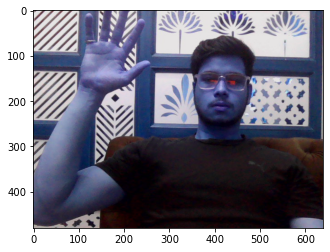

In [14]:
plt.imshow(frame)

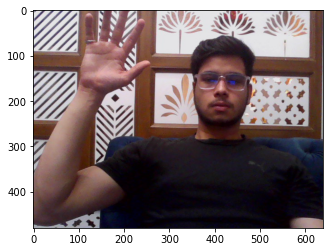

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

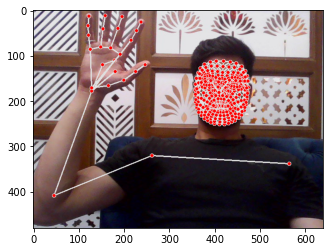

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read Feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to the screen
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('-'):
            break
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_styled_landmarks(frame, results)

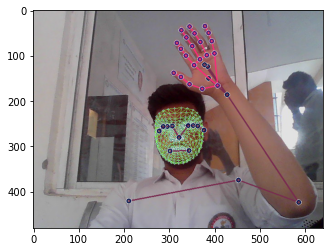

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

THIRD STEP :


In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
results.left_hand_landmarks

landmark {
  x: 0.7026606798171997
  y: 0.3732753396034241
  z: 3.3777558883230085e-07
}
landmark {
  x: 0.6381109356880188
  y: 0.3759918510913849
  z: -0.017833655700087547
}
landmark {
  x: 0.5814024806022644
  y: 0.35330966114997864
  z: -0.023076580837368965
}
landmark {
  x: 0.5455242991447449
  y: 0.3078870177268982
  z: -0.027304571121931076
}
landmark {
  x: 0.5213509798049927
  y: 0.2670762836933136
  z: -0.030265366658568382
}
landmark {
  x: 0.5844562649726868
  y: 0.28169187903404236
  z: -0.0029283177573233843
}
landmark {
  x: 0.5439091324806213
  y: 0.2326979786157608
  z: -0.01613132655620575
}
landmark {
  x: 0.5207861065864563
  y: 0.20090456306934357
  z: -0.02764565870165825
}
landmark {
  x: 0.501349151134491
  y: 0.17036637663841248
  z: -0.03591039404273033
}
landmark {
  x: 0.6088300347328186
  y: 0.24853523075580597
  z: -0.004324902780354023
}
landmark {
  x: 0.5757501721382141
  y: 0.18412669003009796
  z: -0.01566334068775177
}
landmark {
  x: 0.55539023876

In [12]:
results.face_landmarks

landmark {
  x: 0.35926809906959534
  y: 0.5814136862754822
  z: -0.02414579689502716
}
landmark {
  x: 0.35808369517326355
  y: 0.5435689091682434
  z: -0.04274899885058403
}
landmark {
  x: 0.35856181383132935
  y: 0.5558667182922363
  z: -0.022844452410936356
}
landmark {
  x: 0.35073649883270264
  y: 0.5067784190177917
  z: -0.031185701489448547
}
landmark {
  x: 0.3578636646270752
  y: 0.5317517518997192
  z: -0.04523816332221031
}
landmark {
  x: 0.3576243817806244
  y: 0.5167798399925232
  z: -0.04176226630806923
}
landmark {
  x: 0.35718342661857605
  y: 0.4817788898944855
  z: -0.019224999472498894
}
landmark {
  x: 0.3009335398674011
  y: 0.4826095998287201
  z: 0.012394939549267292
}
landmark {
  x: 0.3570079505443573
  y: 0.4553188681602478
  z: -0.013534383848309517
}
landmark {
  x: 0.3569898009300232
  y: 0.4401070177555084
  z: -0.014854533597826958
}
landmark {
  x: 0.3565559983253479
  y: 0.38908851146698
  z: -0.004879937507212162
}
landmark {
  x: 0.3593407273292541

In [13]:
results.pose_landmarks

landmark {
  x: 0.384212464094162
  y: 0.5355470776557922
  z: -1.1335554122924805
  visibility: 0.9998914003372192
}
landmark {
  x: 0.40773534774780273
  y: 0.4751337766647339
  z: -1.038748860359192
  visibility: 0.9998661279678345
}
landmark {
  x: 0.424032062292099
  y: 0.4754444658756256
  z: -1.0388565063476562
  visibility: 0.9998610019683838
}
landmark {
  x: 0.43996185064315796
  y: 0.4761926829814911
  z: -1.0386945009231567
  visibility: 0.9998763799667358
}
landmark {
  x: 0.35445815324783325
  y: 0.47658777236938477
  z: -1.041991949081421
  visibility: 0.9998056888580322
}
landmark {
  x: 0.3342336416244507
  y: 0.47945961356163025
  z: -1.0413058996200562
  visibility: 0.9997385144233704
}
landmark {
  x: 0.31457990407943726
  y: 0.4831419587135315
  z: -1.041465401649475
  visibility: 0.9996970295906067
}
landmark {
  x: 0.45762333273887634
  y: 0.4965408444404602
  z: -0.525590181350708
  visibility: 0.9999038577079773
}
landmark {
  x: 0.2833910584449768
  y: 0.51018

In [12]:
for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])

In [13]:
test

array([ 4.44332212e-01,  2.99811053e+00, -2.63525218e-01,  4.81785137e-05])

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose

[array([ 0.50440246,  0.58387834, -0.58361185,  0.99996537]),
 array([ 0.53488433,  0.53115833, -0.52579033,  0.99991226]),
 array([ 0.55196404,  0.5311237 , -0.5252713 ,  0.99992156]),
 array([ 0.567563  ,  0.53139955, -0.52462232,  0.99991143]),
 array([ 0.4804489 ,  0.53314745, -0.51414645,  0.99990851]),
 array([ 0.46378461,  0.53418356, -0.51328486,  0.99990404]),
 array([ 0.44871688,  0.53537101, -0.51354253,  0.99988526]),
 array([ 0.58935213,  0.55031049, -0.20471485,  0.99992889]),
 array([ 0.43498915,  0.55582309, -0.14209199,  0.99991763]),
 array([ 0.53783619,  0.64489955, -0.46780825,  0.9998998 ]),
 array([ 0.47282934,  0.64786905, -0.45098877,  0.99988741]),
 array([ 0.70788789,  0.779396  , -0.17080405,  0.99958694]),
 array([0.33013672, 0.87651002, 0.05800434, 0.99708092]),
 array([ 0.9168337 ,  0.88177329, -0.78835994,  0.98236006]),
 array([0.24655589, 1.24836707, 0.05386331, 0.31856591]),
 array([ 0.66992664,  0.38845429, -1.21307862,  0.98892367]),
 array([ 0.19685

In [17]:
len(pose)

33

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [19]:
pose

array([ 5.04402459e-01,  5.83878338e-01, -5.83611846e-01,  9.99965370e-01,
        5.34884334e-01,  5.31158328e-01, -5.25790334e-01,  9.99912262e-01,
        5.51964045e-01,  5.31123698e-01, -5.25271297e-01,  9.99921560e-01,
        5.67562997e-01,  5.31399548e-01, -5.24622321e-01,  9.99911427e-01,
        4.80448902e-01,  5.33147454e-01, -5.14146447e-01,  9.99908507e-01,
        4.63784605e-01,  5.34183562e-01, -5.13284862e-01,  9.99904037e-01,
        4.48716879e-01,  5.35371006e-01, -5.13542533e-01,  9.99885261e-01,
        5.89352131e-01,  5.50310493e-01, -2.04714850e-01,  9.99928892e-01,
        4.34989154e-01,  5.55823088e-01, -1.42091990e-01,  9.99917626e-01,
        5.37836194e-01,  6.44899547e-01, -4.67808247e-01,  9.99899805e-01,
        4.72829342e-01,  6.47869051e-01, -4.50988770e-01,  9.99887407e-01,
        7.07887888e-01,  7.79395998e-01, -1.70804054e-01,  9.99586940e-01,
        3.30136716e-01,  8.76510024e-01,  5.80043420e-02,  9.97080922e-01,
        9.16833699e-01,  

In [20]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()

In [21]:
lh

array([ 6.36563003e-01,  3.47553760e-01,  2.10961417e-07,  5.84059238e-01,
        3.62155497e-01, -1.15005532e-02,  5.40219367e-01,  3.40368211e-01,
       -1.28232585e-02,  5.10429502e-01,  3.07334483e-01, -1.47122163e-02,
        4.85183656e-01,  2.87549466e-01, -1.68152433e-02,  5.55226803e-01,
        2.53121227e-01,  5.75248851e-03,  5.27147472e-01,  2.09109396e-01,
       -1.77008996e-03,  5.09567082e-01,  1.78475231e-01, -1.09567372e-02,
        4.96260315e-01,  1.50388479e-01, -1.82130225e-02,  5.76387823e-01,
        2.25712597e-01,  2.11887108e-03,  5.48861861e-01,  1.66046739e-01,
       -5.01803914e-03,  5.28429091e-01,  1.26381248e-01, -1.54384328e-02,
        5.12101471e-01,  9.37089175e-02, -2.32587215e-02,  5.99686563e-01,
        2.08321989e-01, -4.86554904e-03,  5.76951563e-01,  1.46355182e-01,
       -1.57979671e-02,  5.56703210e-01,  1.07158124e-01, -2.71554925e-02,
        5.39072216e-01,  7.54680783e-02, -3.44747826e-02,  6.25722587e-01,
        1.98171258e-01, -

In [22]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test

array([ 0.50440246,  0.58387834, -0.58361185, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
np.save('0', result_test)

In [28]:
np.load('0.npy')

array([ 0.50440246,  0.58387834, -0.58361185, ...,  0.        ,
        0.        ,  0.        ])

FOURTH STEP :

In [29]:
# Path for exported data, numpy array
DATA_PATH = os.path.join('MP_DATA')

# Actions that we try to detect
actions = np.array(['Hello', 'How are you', 'Thankyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to  be thirty frames in length
sequence_length = 30

In [30]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
        

FIFTH STEP :

In [63]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('-'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

SIXTH STEP :

In [40]:
!pip install -U tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.1 requires absl-py~=0.10, but you have absl-py 2.1.0 which is incompatible.
tensorflow-gpu 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 23.5.26 which is incompatible.
tensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.60.1 which is incompatible.
tensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.24.3 which is incompatible.
tensorflow-gpu 2.4.1 requires tensorflow-estimato

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
     --------------------------------------- 14.9/14.9 MB 12.1 MB/s eta 0:00:00
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.60.1-cp38-cp38-win_amd64.whl.metadata (4.2 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 276.5/276.5 MB 1.4 MB/s eta 0:00:00
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ---------------------------------------- 1.7/1.7 MB 6.8 MB/s eta 0:00:00
Using cached grpcio-1.60.1-cp38-cp38-win_amd64.whl (3.7 MB)
   --------------------------------------- 440.8/440.8 kB 13.9 MB/s eta 0:00:00
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      

In [42]:
!pip install tensorflow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [46]:
!pip3 show keras

Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: e:\anaconda\lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [58]:
!pip install tensorflow-modules

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
INFO: pip is looking at multiple versions of tensorboard to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorboard-2.14.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.13 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
mediapipe 0.10.9 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
ml-dtypes 0.2.0 requires numpy>1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.13.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.13.0 requires flatbuffers>=23.1.21, but you have flatbuffers 1.12 which is incompatible.
tenso

    Uninstalling absl-py-2.1.0:
      Successfully uninstalled absl-py-2.1.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.0.0
    Uninstalling google-auth-oauthlib-1.0.0:
      Successfully uninstalled google-auth-oauthlib-1.0.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0
    Uninstalling tensorflow-2.13.0:
      Successfully uninstalled tensorflow-2.13.0


In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'Hello': 0, 'How are you': 1, 'Thankyou': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(90, 30, 1662)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
X_train.shape

(85, 30, 1662)

In [43]:
y_train.shape

(85, 3)

SEVENTH STEP :

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [78]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [79]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 497ms/step - loss: 1.1597 - categorical_accuracy: 0.3640
Epoch 2/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1566 - categorical_accuracy: 0.3386
Epoch 3/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.9376 - categorical_accuracy: 0.5284
Epoch 4/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.3594 - categorical_accuracy: 0.3620
Epoch 5/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1151 - categorical_accuracy: 0.2858
Epoch 6/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.9574 - categorical_accuracy: 0.5929
Epoch 7/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1199 - categorical_accuracy: 0.4424
Epoch 8/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.9844 - categorical_accuracy: 0.6986
Epoch 9/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.7239 - categorical_accuracy: 0.6830


KeyboardInterrupt: 

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

EIGHTH STEP :

In [47]:
res = model.predict(X_test)

In [48]:
actions[np.argmax(res[2])]

'How are you'

In [49]:
actions[y_test[4]]

array(['How are you', 'Hello', 'Hello'], dtype='<U11')

In [50]:
from joblib import dump,load

In [110]:
!pip install dill


   ---------------------------------------- 116.3/116.3 kB 3.4 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [51]:
from tensorflow.keras.models import load_model

In [52]:
Handsign = load_model('action.h5')

In [53]:
yhat = Handsign.predict(X_test)

In [88]:
import pickle

In [96]:
##model.save('action.h5')

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [55]:
yhat = model.predict(X_test)

In [56]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 1],
        [1, 2]],

       [[3, 1],
        [0, 1]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [97]:
from scipy import stats

In [98]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,40+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [59]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('-'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
cap.release()
cv2.destroyAllWindows()